# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento de Dados</span>


### <span style="color:darkred">Exercícios - com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [519]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data_orig = pd.read_csv("./dados/houses_to_rent_mba4.csv")

**Antes de inciar**:

1. Remova todos as linhas duplicadas da base de dados
2. Inspecione o tipo dos atributos e seus valores, realize uma limpeza inicial considerando a:
    1. correção dos dados que forem possíveis inferir o valor verdadeiro, ajustando e padronizando-os 
    2. conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0 
    
        *DICA 1: olhar com detalhe os atributos não numéricos*
        
        *DICA 2: para descobrir quais valores de uma coluna do tipo `object` que podem ser convertidos para dígitos numéricos você pode usar* `dataframe[atributo].astype(str).str.isnumeric()`

In [520]:
data = data_orig.copy()

# removendo duplicatas
data = data_orig.drop_duplicates(keep='first')
print("Antes: %d, Depois remocao duplicatas: %d" % (data_orig.shape[0], data.shape[0]))

Antes: 11765, Depois remocao duplicatas: 11765


In [521]:
# inspecionando atributos nao numéricos
for var in data:
    if not np.issubdtype(data[var].dtype, np.number):
        # imprime variavel e seu tipo
        print(var,"- tipo: ", data[var].dtype.name)
        # se nao numérico
        print("\tnão numérico, valores: ", end="")
        print(data[var].unique())

city - tipo:  object
	não numérico, valores: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte'
 'Brotas' 'Sao Paulo']
floor - tipo:  object
	não numérico, valores: ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '--' '17' '18'
 '5' '13' '15' '16' '14' '26' '21' nan '12' '19' '22' '27' '23' '35' '110'
 '25' '46' '28' '32' '29' '301' '51']
tax - tipo:  object
	não numérico, valores: ['211' '1750' 'nr' ... '1737' '858' '2110']
page hits - tipo:  object
	não numérico, valores: ['324' '720' '64' '46' '1548' '396' '240' '756' '2412' '828' '184' '360'
 '540' '1044' '88' '96' '112' '180' '1476' '186' '648' '416' '432' '60'
 '40' '900' '1440' '528' '20' '1116' '90' '684' '14' '792' '102' '42'
 '1152' '24' '140' '56' '176' '144' '1260' '1080' '216' '92' '576' '936'
 '896' '1296' '32' '228' '816' '52' '104' '148' '204' '320' '48' '108'
 '352' '504' '8' '36' '1764' '468' '972' '34' '54' '864' '62' '4968' 'x'
 '1008' '1800' '1512' '612' '1332' '1584' '76' '44' '26' '

In [522]:
# verificando quantas cidades com nome despadronizado
print(np.sum(data['city']=='Sao Paulo'))

# corrigindo city para padronizacao
data.loc[data['city']=='Sao Paulo','city'] = 'São Paulo'

data['city'].unique()

48


array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte', 'Brotas'], dtype=object)

In [523]:
# inspecionando valores de floor
print(data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].unique())

['-' '--' nan]


In [524]:
data.loc[~data['floor'].astype(str).str.isnumeric(), ['floor','type']]

,floor,type
5,-,house
15,-,house
19,-,house
20,--,house
23,-,house
...,...,...
11748,-,house
11749,-,house
11756,-,house
11763,-,house


In [525]:
# notamos que os valores não numéricos são casas, assim
# substituiremos todos os valores não convertíveis para digitos por '0'
for nn_value in data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].unique():
    data.loc[data['floor'] == nn_value,'floor'] = '0'

# substituindo valores nulos por '0'
data.loc[data['floor'].isnull(),'floor'] = '0'

data.loc[:,'floor'] = pd.to_numeric(data.loc[:,'floor'], downcast='integer', errors='coerce')

print(data['floor'].unique())

[  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  21  12  19  22  27  23  35 110  25  46  28  32  29 301  51]


In [526]:
# inspecionando valores de tax não convertíveis para digitos
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].unique())

# notar que o isnumeric não identificou o '47.5'. Vamos olhar para a linha onde ocorre
data.loc[data['tax'] =='47.5',:]

['nr' '47.5' 'nsa' '-' '---' 'nd']


,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type,country
71,71,Brotas,35.0,4.0,3,1.0,0,0,200,47.5,16,263.5,24,16,24,2,house,Brazil


In [527]:
# tentar converter para númerico, atribuindo nan para os demais
data['tax'] = pd.to_numeric(data.loc[:,'tax'], errors='coerce')

In [528]:
print(data.loc[71,:])

Unnamed: 0             71
city               Brotas
area                   35
rooms                   4
bathroom                3
parking spaces          1
floor                   0
hoa                     0
rent                  200
tax                  47.5
insurance              16
total               263.5
page hits              24
days available         16
interactions           24
weeks available         2
type                house
country            Brazil
Name: 71, dtype: object


In [529]:
# inspecionando valores de page hits
print(data.loc[~data['page hits'].astype(str).str.isnumeric(), 'page hits'].unique())

# verificando se há relacao com outros atributos
data.loc[~data['page hits'].astype(str).str.isnumeric(), ['interactions','weeks available']]

['x']


,interactions,weeks available
112,0,0
150,0,0
188,0,0
226,0,0
264,0,0
313,0,0
362,0,0
411,0,0
460,0,0
509,0,40


In [530]:
# claramente os page hits inválidos estao relacionados a imoveis recem
# disponibilizados, e sem interacoes na página

# convertendo os pagehits para número
data.loc[:,'page hits'] = pd.to_numeric(data.loc[:,'page hits'], errors='coerce')

# devido ao que observamos, podemos substituir nao nulos por '0'
data.loc[data['page hits'].isnull(),'page hits'] = 0

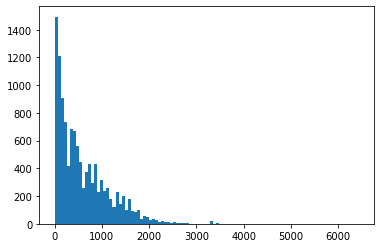

In [531]:
h = plt.hist(data['page hits'], bins =100)

In [532]:
# inspecionando atributos nao numéricos
for var in data:
    # imprime variavel e seu tipo
    print(var,"- tipo: ", data[var].dtype.name)


Unnamed: 0 - tipo:  int64
city - tipo:  object
area - tipo:  float64
rooms - tipo:  float64
bathroom - tipo:  int64
parking spaces - tipo:  float64
floor - tipo:  int16
hoa - tipo:  int64
rent - tipo:  int64
tax - tipo:  float64
insurance - tipo:  int64
total - tipo:  float64
page hits - tipo:  float64
days available - tipo:  int64
interactions - tipo:  int64
weeks available - tipo:  int64
type - tipo:  object
country - tipo:  object


In [533]:
# verificando quantas cidades com nome despadronizado
print(np.sum(data['country']!='Brazil'))

# corrigindo city para padronizacao
data.loc[data['country']!='Brazil','country'] = 'Brazil'

data['country'].unique()

4


array(['Brazil'], dtype=object)

### Exercício 1)
 
Considerando a limpeza inicial realizada, responda as questões abaixo:
 
#### Exercício 1, questão I

Quantos linhas relativas a valores da coluna "city" estavam fora do padrão e foram corrigidos?

(a) 49<br>
<font color='red'>(b) 48<br></font>
(c) 46<br>
(d) 50<br>

<font color='red'>Resposta</font>: *uma forma de obter essa informacao é, antes de padronizar, executar:* `print(np.sum(data['city']=='Sao Paulo'))`

#### Exercício 1, questão II

Em quais dos atributos convertidos para numéricos foi possível substituir valores inválidos (strings e nulos/nans) por valores numéricos não nulos?

(a) floor e city<br>
(b) floor e tax<br>
<font color='red'>(c) floor e page hits</font><br>
(d) tax e page hits<br>

<font color='red'>Resposta</font>: *sabendo que floor possui todos os valores não convertíveis para numérico diferentes de zero, e relacionados a casas, substituimos por 0; sabendo que não havia pagehits iguais a zero na coluna e que estavam relacionados a imóveis recém disponibilizados e interacoes na página, também foi substituído por zero. City não é numérico, e Tax teve os valores inválidos considerados nulos por não haver padrões que indiquem que possam ser preenchidos.*

<font color='red'>Resposta</font>: *todos os campos e registros são endereçáveis e passíveis de armazenamento e recuperação. O atributo Foto se refere ao arquivo da imagem que contém a foto, mas não à informações visuais contidas nessas imagens. Ainda que as imagens sejam não-estruturadas, o dado relativo ao nome do arquivo é estruturado. Assim, a tabela contém dados estruturados*

---
### Exercício 2)

Vamos analisar possíveis atributos redundantes na base de dados.

1. Inspecione as colunas imprimindo quantos valores únicos cada uma possui.
2. Execute o seguinte comando `data.corr(method='pearson')` para obter a correlação de Pearson entre colunas numéricas, e visualize aquelas com correlacao acima de 0.75

DICA: você pod filtrar os resultados utilizando por exemplo `data.corr(method='pearson') >= 0.75`

OBS: mais informacoes sobre correlação em [https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson]

Depois, responda às questões abaixo.

In [534]:
# inspecionando atributos nao numéricos
for var in data:
    print(var, ' / únicos : ', data[var].unique().shape[0])

Unnamed: 0  / únicos :  11765
city  / únicos :  6
area  / únicos :  509
rooms  / únicos :  11
bathroom  / únicos :  12
parking spaces  / únicos :  10
floor  / únicos :  36
hoa  / únicos :  1620
rent  / únicos :  1172
tax  / únicos :  1223
insurance  / únicos :  218
total  / únicos :  6132
page hits  / únicos :  290
days available  / únicos :  157
interactions  / únicos :  217
weeks available  / únicos :  50
type  / únicos :  2
country  / únicos :  1


In [535]:
#webatts = ['page hits', 'days available', 'interactions', 'weeks available']
dcor = data.corr(method='pearson')

dcor

,Unnamed: 0,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available
Unnamed: 0,1.000000,-0.004145,-0.001653,-0.045922,-0.058143,-0.021977,0.000316,-0.053392,-0.008836,-0.041953,-0.013994,-0.064022,0.019634,-0.034600,0.019700
area,-0.004145,1.000000,0.344422,0.361546,0.345481,-0.050780,0.012980,0.315796,0.076942,0.182517,0.098935,0.012436,0.005182,0.007667,0.004968
rooms,-0.001653,0.344422,1.000000,0.732381,0.562258,-0.118153,0.009045,0.533520,0.079413,0.290466,0.145046,-0.001699,0.019052,-0.001155,0.018806
bathroom,-0.045922,0.361546,0.732381,1.000000,0.665872,-0.032133,0.049109,0.643843,0.113129,0.337230,0.215160,0.080540,0.037207,0.053947,0.037105
parking spaces,-0.058143,0.345481,0.562258,0.665872,1.000000,-0.105408,0.076766,0.516388,0.096152,0.263882,0.380530,0.069313,-0.002638,0.044227,-0.002688
floor,-0.021977,-0.050780,-0.118153,-0.032133,-0.105408,1.000000,0.018414,0.027201,0.008291,-0.022648,0.024772,0.074052,-0.023601,0.053485,-0.023608
hoa,0.000316,0.012980,0.009045,0.049109,0.076766,0.018414,1.000000,0.032452,0.007490,0.012725,0.950029,0.003546,0.011857,0.013619,0.011804
rent,-0.053392,0.315796,0.533520,0.643843,0.516388,0.027201,0.032452,1.000000,0.107647,0.521391,0.279823,0.144875,0.035388,0.107720,0.035392
tax,-0.008836,0.076942,0.079413,0.113129,0.096152,0.008291,0.007490,0.107647,1.000000,0.079442,0.220014,0.014429,-0.008892,0.006317,-0.009090
insurance,-0.041953,0.182517,0.290466,0.337230,0.263882,-0.022648,0.012725,0.521391,0.079442,1.000000,0.150836,0.057878,0.029429,0.046508,0.029635


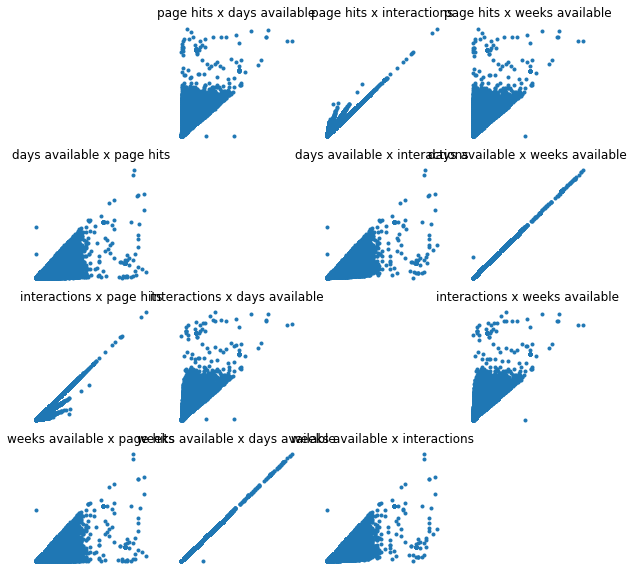

In [536]:
def plot_pairwise(df, attr):
    m = len(attr)
    i = 1
    plt.figure(figsize=(10,10))
    for var1 in attr:
        for var2 in attr:
            if (var1 != var2):
                plt.subplot(m,m,i)
                x1 = np.array(df[var1])
                x2 = np.array(df[var2])
                plt.plot(x1, x2, '.'); plt.title('%s x %s' % (var1, var2))
                plt.axis('off')
            i = i + 1
            
attr = ['page hits', 'days available', 'interactions', 'weeks available']
plot_pairwise(data,attr)

#### Exercício 2, questão I

Há algum atributo irrelevante que é possível remover, apenas pela análise dos valors únicos?

(a) type<br>
<font color='red'>(b) country</font><br>
(c) city<br>
(d) não é possível remover nenhum atributo segundo esse critério<br>

<font color='red'>Resposta</font>: *apenas country possui todos os valores iguais, após corrigido, e poderia ser removido sem prejuízo para a análise*

#### Exercício 2, questão II

Qual atributo possui a maior quantidade de valores únicos/distintos?

<font color='red'>(a) total</font><br>
(b) area<br>
(c) hoa<br>
(d) rent<br>

<font color='red'>Resposta</font>: *execute o código a seguir para visualizar*

`vars_data = np.array(list(data))[1:]
uniquevals = []
for var in vars_data:
    uniquevals.append(data[var].unique().shape[0])
maxunique = np.argmax(uniquevals)
print(uniquevals[maxunique], ' var: ', vars_data[maxunique])`

#### Exercício 2, questão III

Variáveis com alta correlação indicam que uma variável é capaz de explicar a outra. Nesse caso, a não ser por uma análise mais fina dos dados individuais, para fins de uma análise global, as variáveis com correlação próxima a 1 poderiam ser removidas.

Considerando esse cenário, quais variáveis possuem correlações superiores a 0.75 com outra variável diferente dessa?

<font color='red'>(a) 'page hits', 'days available', 'interactions', 'weeks available', 'hoa' e 'total'</font><br>
(b) 'page hits', 'days available', 'interactions', 'weeks available', 'rent' e 'total'<br>
(b) 'page hits', 'days available', 'interactions' e 'weeks available'<br>
(d) todas as variáveis

<font color='red'>Resposta</font>: *inspecionar a tabela dada pela correlação de Pearson.*


#### Exercício 2, questão IV

Utiliza a funcao `plot_pairwise()` dada em aula para plotar par-a-par as variáveis: 'page hits', 'days available', 'interactions', 'weeks available'

O que podemos notar comparando o gráfico com os valores de correlação?

(a) Quanto maior a correlação, mais o gráfico se assemelha a uma nuvem de pontos aleatória<br>
(b) Quanto menor a correlação, mais o gráfico se assemelha a uma reta<br>
<font color='red'>(c) Quanto maior a correlação, mais o gráfico se assemelha a uma reta</font><br>
(d) Não há qualquer padrão entre o valor da correlação e a visualização dos gráficos

---

### Exercício 3)

Vamos procurar por outliers na base de dados utilizando um método baseado na dispersão pelo desvio padrão. 

* Codifique uma funcao em Python no formato abaixo, que receba por parâmetro um dataframe, uma lista de atributos/variáveis e um fator multiplicador `t` para o desvio padrão.
`def remove_outliers_std(df, attributes, t):`
    Essa funcao deve retornar um dataframe sem os outliers segundo o método do desvio padrão, ou seja, removendo aqueles cujo valor esteja: abaixo da média menos `t` desvios padrões, ou acima da média mais `t` desvios padrões. Formalmente, são ouliers valores $x$ tal que $x < \mu - t\sigma$ ou $x > \mu + t\sigma$. A funcao deve processar apenas variáveis numéricas e imprimir na tela a quantidade de outliers encontrados
    

In [537]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn

In [538]:
data_out = remove_outliers_std(data,['page hits'], 3.5)
data_out = remove_outliers_std(data_out,['total', 'insurance'], 2)
data_out = remove_outliers_std(data_out,['rent'], 5)

page hits, mu = 593.14, std = 559.73, outliers = 65
total, mu = 5621.22, std = 15835.52, outliers = 7
insurance, mu = 56.48, std = 97.69, outliers = 55
rent, mu = 3944.89, std = 3318.78, outliers = 0


In [539]:
data_out = remove_outliers_std(data,['rent'], 6)

rent, mu = 4033.43, std = 3564.19, outliers = 15


#### Exercício 3, questão I

Utilize a funcao implementada para remover outliers:
1. utilizando a variável 'page hits' com $t=3.5$
2. considerando a base obtida no passo anterior, para 'total' e 'insurance' com $t=2$.
3. considerando a base obtida no passo anterior, para 'rent' com $t=5$

Quantos outliers foram encontrados respectivamente para 'page hits', 'total', 'insurance' e  'rent', nessa ordem?

<font color='red'>(a) 65, 7, 55 e 0</font><br>
(b) 55, 65, 7 e 10<br>
(c) 65, 7, 10 e 55<br>
(d) 65, 55, 7 e 0<br>

#### Exercício 3, questão II

Utilize a funcao implementada para, considerando a base original (sem processamento da questão anterior), remover outliers relacionados a 'rent' com $t=6$.

Qual o resultado e sua interpretacao?

(a) encontrado 15 outliers, pois aumentamos o valor de $t$ para 6 permitindo capturar mais linhas<br>
<font color='red'>(b) foram encontrados 15 outliers, não encontrados na questão anterior pois essas linhas já haviam sido removidas na análise de atributos anteriores</font><br>
(d) foi encontrado apenas 1 outlier pois a variável possui pouca dispersão com relação a média<br>
(d) nenhum outlier encontrado<br>

---

### Exercício 4)

Ainda analisando outliers, após remover outliers segundo indicado no Exercício 3, questão I:

Carregue o método $k$-Means utilizando: `from sklearn.cluster import KMeans`
    1. Realize análise de agrupamento utilizando os atributos 'page hits' e 'days available' e $k=100$ grupos. Utilize o parâmetro `random_state=2` ao criar o modelo
    2. Identifique os grupos (clusters) que possuem menos do que 5 pontos
    3. Considere todos os pontos pertencentes à esses grupos como candidatos a outliers
    
OBS: ver detalhes do KMeans em [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]

Responda às questões abaixo.


page hits, mu = 593.14, std = 559.73, outliers = 65
total, mu = 5621.22, std = 15835.52, outliers = 7
insurance, mu = 56.48, std = 97.69, outliers = 55
rent, mu = 3944.89, std = 3318.78, outliers = 0
Número de outliers estimados: 7


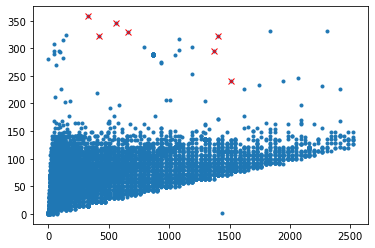

In [540]:
from sklearn.cluster import KMeans
from sklearn import metrics

data_out = remove_outliers_std(data,['page hits'], 3.5)
data_out = remove_outliers_std(data_out,['total', 'insurance'], 2)
data_out = remove_outliers_std(data_out,['rent'], 5)

X1 = np.array(data_out['page hits'])
X2 = np.array(data_out['days available'])
X = np.vstack((X1,X2)).T

k = 100
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
outputs = kmeans.labels_

small_clusters = []
outliers = np.array([ ])
for i in range(k):
    if (np.sum(outputs == i) < 5 ):
        small_clusters.append(i)
        points = np.where(outputs == i)[0]
        outliers = np.concatenate((outliers, points)).astype(int)

n_outl_ = outliers.shape[0]

print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outliers], X2[outliers],'xr')
plt.show()

#### Exercício 4, questão I

Quantos outliers foram encontrados?

(a) 1<br>
(b) 5<br>
<font color='red'>(c) 7</font><br>
(d) 27<br>


#### Exercício 4, questão II

Altere o número de grupos para $k=300$ e considere outliers aqueles pontos em grupos com 2 ou menos exemplos. Quantos outliers foram encontrados?

(a) 5<br>
(b) 300<br>
(c) 39<br>
<font color='red'>(d) 27</font><br>
    
    
<font color='red'>Resposta</font>: *ver código abaixo*


Número de outliers estimados: 27


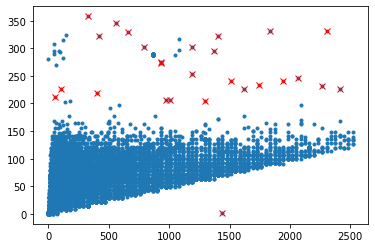

In [541]:
k = 300
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
outputs = kmeans.labels_

small_clusters = []
outliers = np.array([ ])
for i in range(k):
    if (np.sum(outputs == i) <= 2):
        small_clusters.append(i)
        points = np.where(outputs == i)[0]
        outliers = np.concatenate((outliers, points)).astype(int)

n_outl_ = outliers.shape[0]

print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outliers], X2[outliers],'xr')
plt.show()

---

### Exercício 5)

Considerando o preenchimento de dados faltantes, utilize a base de dados após remover outliers segundo indicado no Exercício 3, questão I.

Imprima o total de valores faltantes em cada variável.

Codifique uma funcão que preencha valores faltantes utilizando a média condicionada a uma outra variável categórica (não numérica) da base. Essa funcao deverá:
1. calcular a média da variável alvo (a ser preenchida) relativa a cada valor distinto da variável categórica selecionada
2. atribuir a média calculada a todas as linhas cuja variavel alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(value,1)`

    Exemplo: podemos preencher a média do imposto (tax) condicionado ao tipo (type) calculando a média do imposto agrupado por cada valor de tipo ('house' e 'flat'), e depois atribuir essas médias aos valores faltantes condicionado ao tipo.
   Assim, uma propriedade que é do tipo 'house' e que possui 'tax' faltante, recebe a média de 'tax' entre todas os imóveis marcados com 'house' para os quais há valor de 'tax'.
   
Responda as questões abaixo:

In [542]:
# verificando atributos faltantes
for var in data_out:
    # imprime variavel
    missvar = np.sum(data_out[var].isnull())
    if (missvar > 0):
        print(var,"- faltantes: ", missvar)

area - faltantes:  78
rooms - faltantes:  77
parking spaces - faltantes:  2945
tax - faltantes:  6


In [543]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)
        
        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,0)
            
        print('\t %s media = %.1f' % (j, mu_cat))
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
        
    return dfn

#### Exercício 5, questão I

Quantas variáveis possuem valores faltantes?

<font color='red'>(a) 4</font><br>
(b) 5<br>
(c) 1<br>
(d) 10<br>

<font color='red'>Resposta</font>: *area - faltantes:  78, rooms - faltantes:  77, parking spaces - faltantes:  2945, tax - faltantes:  6, total de variáveis = 4*


#### Exercício 5, questão II

Use sua funcao para preencher a 'area' condicionado a 'type'. Após o preenchimento, qual é a nova média para todas as linhas do atributo 'area', e arredondando para três casas decimais?

<font color='red'>(a) 144.557</font><br>
(b) 232.500<br>
(d) 144.493<br>
(d) 119.100<br>

In [560]:
data_fill = missing_condmean(data_out, 'area', 'type')
data_fill[data_out['area'].isnull()].head()

print('Antes do preenchimento: ', np.round(np.mean(data_out.loc[:, 'area']),3))
print('Depois do preenchimento: ', np.round(np.mean(data_fill.loc[:, 'area']),3))

- preencher  area  condicionado a  type : 78 faltantes
	 flat media = 119.1
	 house media = 232.5
Antes do preenchimento:  144.493
Depois do preenchimento:  144.557


#### Exercício 4, questão III

Use sua funcao para preencher 'tax' condicionado a 'city'. Quais foram as médias encontradas para as cidades de São Paulo, Porto Alegre e Brotas, respectivamente?

(a) 422.6, 118.0 e 106.5<br>
(b) 423.0, 347.0 e 100.0<br>
(d) 273.0, 147.1 e 106.5<br>
<font color='red'>(d) 422.6, 118.2 e 106.6</font><br>

In [559]:
data_fill = missing_condmean(data_fill, 'tax', 'city')
data_fill[data_out['tax'].isnull()]

np.round(np.mean(data_fill.loc[:, 'tax']),2)


- preencher  tax  condicionado a  city : 6 faltantes
	 São Paulo media = 422.6
	 Porto Alegre media = 118.2
	 Rio de Janeiro media = 247.2
	 Campinas media = 147.1
	 Belo Horizonte media = 273.0
	 Brotas media = 106.6


336.02

---

### Exercício 6)

Considere os atributos 'type' e 'city' e analise a distribuicao dos seus valores.

Para o atributo 'city', realize a análise desconsiderando a cidade de São Paulo.

Calcule a porcentagem de exemplos da categoria com menor quantidade de dados encontrada com relacao ao total.

Responda as questões abaixo:

porcentagem frente ao total: 22.4742%


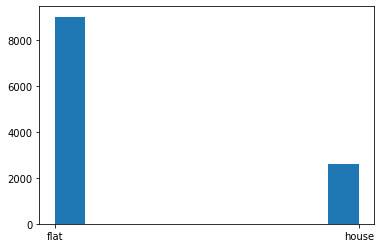

In [518]:
plt.hist(data_fill['type'])
data_fill['type'].describe()

tot_house = np.sum(data_fill['type']=='house')

print("porcentagem frente ao total: %.4f%%" % ((tot_house/data_fill.shape[0])*100))


10
porcentagem frente ao total: 0.0859%


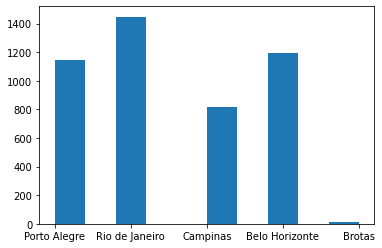

In [516]:
plt.hist(data_fill.loc[data_fill['city']!='São Paulo', 'city'])
data_fill.loc[data_fill['city']!='São Paulo', 'city'].describe()

tot_brotas = np.sum(data_fill['city']=='Brotas')

print(tot_brotas)
print("porcentagem frente ao total: %.4f%%" % ((tot_brotas/data_fill.shape[0])*100))


#### Exercício 5, questão I

Podemos considerar que:

(a) apenas "city" (sem São Paulo) é desbalanceada<br>
(b) apenas "type" é desbalanceada<br>
<font color='red'>(c) ambas as análises indicam desbalaceamento dos dados</font><br>
(d) ambas as análises indicam desbalaceamento dos dados<br>

#### Exercício 5, questão II

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "type" como variável alvo (de saída) para um modelo de aprendizado?

(a) não é possível utilizar essas variáveis<br>
(b) não é preciso fazer nenhum tratamento<br>
<font color='red'>(c) considerar o uso de técnicas de sobreamostragem para 'house'</font><br>
(d) considerar o uso de técnicas de sobreamostragem para 'flat' <br>

<font color='red'>Resposta:</font> *ainda que não fazer nenhum tratamento seja possível, considerar a sobreamostragem de 'house' pode ser importante nesse cenário em que 'house' corresponde a 22% dos dados, ou seja, temos um balanceamento de aproximadamente 1:4.5*
    
#### Exercício 5, questão III

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "city" (desconsiderando São Paulo) como variável alvo (de saída) para um modelo de aprendizado?

<font color='red'>(a) remover a cidade "Brotas" da análise e rebalancear as demais</font><br>
(b) realizar uma combinacão de técnicas de subamostragem (para as categorias majoritárias) e sobreamostragem (para as minoritátias)<br>
(c) utilizar o método SMOTE<br>
(d) considerar o uso de técnicas de subamostragem para as categorias majoritárias<br>

<font color='red'>Resposta:</font> *ainda que considerar métodos para tratar o desbalanceamento seja possível, Brotas possui menos de 0.1% do total de dados, inviabilizando seu uso frente às demais cidades, sendo recomendado descartá-la*